### Normal Random generator using the Box-Muller method

In [15]:
import numpy as np
import matplotlib.pyplot as plt

<>:76: SyntaxWarning: invalid escape sequence '\s'
<>:76: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jmarq\AppData\Local\Temp\ipykernel_18884\3736875969.py:76: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Box-Muller Normal Generator (Mean={mu}, $\sigma$={sigma})")


--- Results for N=100000 ---
Target Mean: 20, Calculated Mean: 19.99173
Target Var:  25, Calculated Var:  24.89666
Target Std:  5, Calculated Std:  4.98966


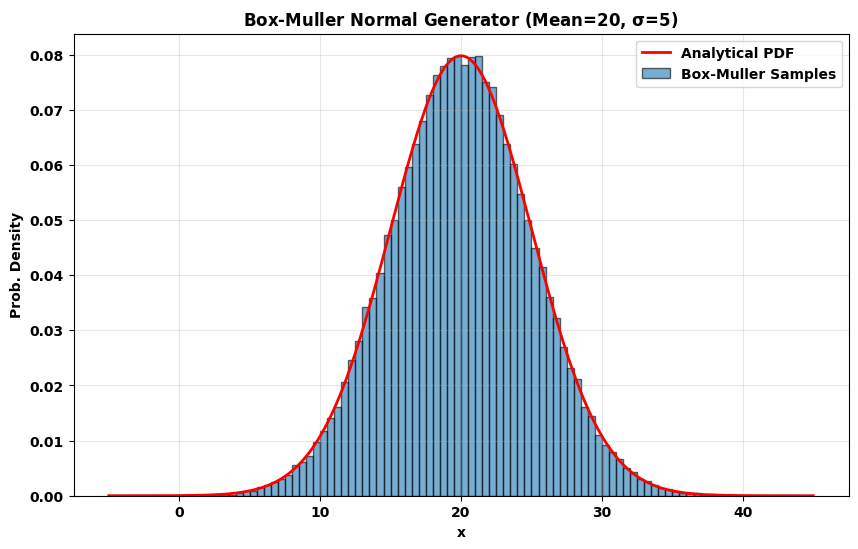

In [ ]:
# INITIAL PARAMETERS
mu = 20
sigma = 5
n_samples = 100000

# HISTOGRAM INITIALIZATION
# note any normal distribution is effectively zero beyond 5 standard deviations from the mean
bin_min = mu - 5 * sigma
bin_max = mu + 5 * sigma
n_bins = 100
bin_edges = np.linspace(bin_min, bin_max, n_bins + 1)
bin_counts = np.zeros(n_bins)

# ACUMULATORS 
sum_x = 0.0
sum_x2 = 0.0

# SIM LOOP 
# note the Box-Muller method generates two values ($z_0, z_1$) for every two random inputs ($u_1, u_2$)
for i in range(n_samples // 2):
    u1 = np.random.random() + 1e-10   # avoid log(0)
    u2 = np.random.random()

    r = np.sqrt(-2.0 * np.log(u1))  # radius
    phi = 2.0 * np.pi * u2          # angle
    
    # these variables follow a normal distribution with mean 0 and standard deviation 1:
    z0 = r * np.cos(phi)
    z1 = r * np.sin(phi)
    
    x0 = mu + sigma * z0
    x1 = mu + sigma * z1
    
    # update histogram
    for x in [x0, x1]:
        if bin_min <= x < bin_max:
            bin_idx = int((x - bin_min) / (bin_max - bin_min) * n_bins)
            bin_counts[bin_idx] += 1

    
    # update accumulators
    sum_x += x0 + x1
    sum_x2 += x0**2 + x1**2


# FINAL CALCULATIONS
# Sample Mean: <x>
mean_est = sum_x / n_samples

# Sample Variance: <x^2> - <x>^2
var_est = (sum_x2 / n_samples) - (mean_est ** 2)
std_est = np.sqrt(var_est)

print(f"--- Results for N={n_samples} ---")
print(f"Target Mean: {mu}, Calculated Mean: {mean_est:.5f}")
print(f"Target Var:  {sigma**2}, Calculated Var:  {var_est:.5f}")
print(f"Target Std:  {sigma}, Calculated Std:  {std_est:.5f}")

# PLOTTING
plt.figure(figsize=(10, 6))

# Center the bins for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
# Calculate PDF width (bin width) for normalization
bin_width = bin_edges[1] - bin_edges[0]
# Normalize counts to match PDF area (= 1)
normalized_counts = bin_counts / (n_samples * bin_width)

plt.bar(bin_centers, normalized_counts, width=bin_width, alpha=0.6, label='Box-Muller Samples', edgecolor='black')

# Plot Analytical PDF for comparison
x_pdf = np.linspace(bin_min, bin_max, 1000)
pdf = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x_pdf - mu) / sigma)**2)
plt.plot(x_pdf, pdf, 'r-', lw=2, label='Analytical PDF')

plt.title(f"Box-Muller Normal Generator (Mean={mu}, $\sigma$={sigma})")
plt.xlabel("x")
plt.ylabel("Prob. Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

We have used a machine (the Box-Muller method) to go from two random and uniform variables to another two random and normal variables, which are more common in physics-related problems. While doing so, we have used on-the-fly calculations so that we do not run out of RAM memory. 